In [3]:
import pandas as pd
import numpy as np
import optuna, optuna_dashboard
import tqdm as notebook_tqdm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import xgboost as xgb

c:\Users\admin\Desktop\EksploracjaDanych\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SVM ; LR ; XGBOOST


In [11]:
rf_data = pd.read_csv(
    "C:/Users/admin/Desktop/EksploracjaDanych/HeartDiseaseDiagnosis/final_named_and_cleaned_data_0_5_with_fram_random_forrest.csv"
)


lg_data = pd.read_csv(
    "C:/Users/admin/Desktop/EksploracjaDanych/HeartDiseaseDiagnosis/final_named_and_cleaned_data_0_5_with_fram_logistic_regression.csv"
)

In [12]:
y_lg_data = lg_data["num"]
y_rf_data = rf_data["num"]

In [ ]:
X_lg_data = lg_data.drop(["num"], axis=1)
X_rf_data = rf_data.drop(["num"], axis=1)
X_lg_data = lg_data[
    [
        "age",
        "sex",
        "chol",
        "trestbps",
        "dm",
        "thaldur",
        "thaltime",
        "met",
        "thalach",
        "thalrest",
        "tpeakbps",
        "trestbpd",
        "tpeakbpd",
        "36",
        "oldpeak",
        "painloc",
        "painexer",
        "relrest",
        "pncaden",
        "cp",
        "htn",
        "smoke",
        "fbs",
        "restecg",
        "dig",
        "prop",
        "nitr",
        "pro",
        "diuretic",
        "exang",
        "xhypo",
        "slope",
        "lmt",
        "ladprox",
        "laddist",
        "diag",
        "cxmain",
        "ramus",
        "om1",
        "om2",
        "rcaprox",
        "rcadist",
    ]
]
X_rf_data = rf_data[
    [
        "age",
        "sex",
        "chol",
        "trestbps",
        "dm",
        "thaldur",
        "thaltime",
        "met",
        "thalach",
        "thalrest",
        "tpeakbps",
        "trestbpd",
        "tpeakbpd",
        "36",
        "oldpeak",
        "painloc",
        "painexer",
        "relrest",
        "pncaden",
        "cp",
        "htn",
        "smoke",
        "fbs",
        "restecg",
        "dig",
        "prop",
        "nitr",
        "pro",
        "diuretic",
        "exang",
        "xhypo",
        "slope",
        "lmt",
        "ladprox",
        "laddist",
        "diag",
        "cxmain",
        "ramus",
        "om1",
        "om2",
        "rcaprox",
        "rcadist",
    ]
]

Preprocess for SVM


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat",
            OneHotEncoder(),
            [
                "painloc",
                "painexer",
                "relrest",
                "pncaden",
                "cp",
                "htn",
                "smoke",
                "fbs",
                "restecg",
                "dig",
                "prop",
                "nitr",
                "pro",
                "diuretic",
                "exang",
                "xhypo",
                "slope",
                "lmt",
                "ladprox",
                "laddist",
                "diag",
                "cxmain",
                "ramus",
                "om1",
                "om2",
                "rcaprox",
                "rcadist",
            ],
        ),
        (
            "num",
            StandardScaler(),
            [
                "age",
                "sex",
                "chol",
                "trestbps",
                "dm",
                "thaldur",
                "thaltime",
                "met",
                "thalach",
                "thalrest",
                "tpeakbps",
                "trestbpd",
                "tpeakbpd",
                "36",
                "oldpeak",
            ],
        ),
    ]
)

In [6]:
preprocessor.fit_transform(X_rf_data)
preprocessor.fit_transform(X_lg_data)

array([[ 0.        ,  1.        ,  0.        , ...,  0.83319935,
         0.25494444,  1.36838584],
       [ 0.        ,  1.        ,  0.        , ...,  1.7076432 ,
         0.79135517,  0.61215599],
       [ 0.        ,  1.        ,  0.        , ..., -0.62420706,
        -0.2814663 ,  1.65197204],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.04124449,
        -0.2814663 ,  2.97537428],
       [ 0.        ,  1.        ,  1.        , ..., -1.79013218,
        -2.42710926, -0.80577498],
       [ 0.        ,  1.        ,  1.        , ..., -0.62420706,
        -0.2814663 , -0.80577498]], shape=(1347, 115))

In [ ]:
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(
    X_lg_data, y_lg_data, test_size=0.2, random_state=42
)


X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf_data, y_rf_data, test_size=0.2, random_state=42
)

In [ ]:
def objective(trial):

    params = {
        "C": trial.suggest_loguniform("C", 1e-3, 1e3),
        "kernel": trial.suggest_categorical(
            "kernel", ["linear", "rbf", "poly", "sigmoid"]
        ),
        "shrinking": trial.suggest_categorical("shrinking", [True, False]),
        "tol": trial.suggest_loguniform("tol", 1e-5, 1e-1),
        "class_weight": trial.suggest_categorical("class_weight", [None, "balanced"]),
    }

    if params["kernel"] in ["rbf", "poly", "sigmoid"]:
        params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 10.0)
    else:
        params["gamma"] = "scale"

    if params["kernel"] == "poly":
        params["degree"] = trial.suggest_int("degree", 2, 5)
    else:
        params["degree"] = 3

    if params["kernel"] in ["poly", "sigmoid"]:
        params["coef0"] = trial.suggest_float("coef0", 0.0, 1.0)
    else:
        params["coef0"] = 0.0

    clf = Pipeline([("scaler", StandardScaler()), ("svc", SVC(**params))])

    score = cross_val_score(clf, X_train_lg, y_train_lg, cv=10, scoring="accuracy")
    return score.mean()

In [ ]:
study_name = "svm_optimization_lg"
storage_name = "sqlite:///example.db"
study_lg_svm = optuna.create_study(
    study_name=study_name,
    storage=storage_name,
    direction="maximize",
    load_if_exists=True,
)
study_lg_svm.optimize(objective, n_trials=10000)

[I 2025-05-01 16:52:40,046] Using an existing study with name 'svm_optimization_lg' instead of creating a new one.
C:\Users\barto\AppData\Local\Temp\ipykernel_24544\2461203300.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 1e3),
C:\Users\barto\AppData\Local\Temp\ipykernel_24544\2461203300.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'tol': trial.suggest_loguniform('tol', 1e-5, 1e-1),
[I 2025-05-01 16:52:41,491] Trial 689 finished with value: 0.6852544132917965 and parameters: {'C': 0.2144902066226023, 'kernel': 'linear', 'shrinking': False, 'tol': 0.00032950769675930497, 'class_weight': None}. Best is trial 31 with va

In [ ]:
def objective(trial):

    params = {
        "C": trial.suggest_loguniform("C", 1e-3, 1e3),
        "kernel": trial.suggest_categorical(
            "kernel", ["linear", "rbf", "poly", "sigmoid"]
        ),
        "shrinking": trial.suggest_categorical("shrinking", [True, False]),
        "tol": trial.suggest_loguniform("tol", 1e-5, 1e-1),
        "class_weight": trial.suggest_categorical("class_weight", [None, "balanced"]),
    }

    if params["kernel"] in ["rbf", "poly", "sigmoid"]:
        params["gamma"] = trial.suggest_loguniform("gamma", 1e-4, 10.0)
    else:
        params["gamma"] = "scale"

    if params["kernel"] == "poly":
        params["degree"] = trial.suggest_int("degree", 2, 5)
    else:
        params["degree"] = 3

    if params["kernel"] in ["poly", "sigmoid"]:
        params["coef0"] = trial.suggest_float("coef0", 0.0, 1.0)
    else:
        params["coef0"] = 0.0

    clf = Pipeline([("scaler", StandardScaler()), ("svc", SVC(**params))])

    score = cross_val_score(clf, X_train_rf, y_train_rf, cv=10, scoring="accuracy")
    return score.mean()

In [ ]:
study_name = "svm_optimization_rf"
storage_name = "sqlite:///example.db"
study_rf_svm = optuna.create_study(
    study_name=study_name,
    storage=storage_name,
    direction="maximize",
    load_if_exists=True,
)
study_rf_svm.optimize(objective, n_trials=10000)

[I 2025-05-01 16:54:28,935] Using an existing study with name 'svm_optimization_rf' instead of creating a new one.
C:\Users\barto\AppData\Local\Temp\ipykernel_3880\725593499.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 1e3),
C:\Users\barto\AppData\Local\Temp\ipykernel_3880\725593499.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'tol': trial.suggest_loguniform('tol', 1e-5, 1e-1),
C:\Users\barto\AppData\Local\Temp\ipykernel_3880\725593499.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_f

KeyboardInterrupt: 

Preprocessing for XGBoost


In [ ]:
X_lg_xg_data = lg_data.drop(["num"], axis=1)
X_rf_xg_data = rf_data.drop(["num"], axis=1)
X_lg_data = X_lg_xg_data[
    [
        "age",
        "sex",
        "chol",
        "trestbps",
        "dm",
        "thaldur",
        "thaltime",
        "met",
        "thalach",
        "thalrest",
        "tpeakbps",
        "trestbpd",
        "tpeakbpd",
        "36",
        "oldpeak",
        "painloc",
        "painexer",
        "relrest",
        "pncaden",
        "cp",
        "htn",
        "smoke",
        "fbs",
        "restecg",
        "dig",
        "prop",
        "nitr",
        "pro",
        "diuretic",
        "exang",
        "xhypo",
        "slope",
        "lmt",
        "ladprox",
        "laddist",
        "diag",
        "cxmain",
        "ramus",
        "om1",
        "om2",
        "rcaprox",
        "rcadist",
    ]
]
X_rf_data = X_rf_xg_data[
    [
        "age",
        "sex",
        "chol",
        "trestbps",
        "dm",
        "thaldur",
        "thaltime",
        "met",
        "thalach",
        "thalrest",
        "tpeakbps",
        "trestbpd",
        "tpeakbpd",
        "36",
        "oldpeak",
        "painloc",
        "painexer",
        "relrest",
        "pncaden",
        "cp",
        "htn",
        "smoke",
        "fbs",
        "restecg",
        "dig",
        "prop",
        "nitr",
        "pro",
        "diuretic",
        "exang",
        "xhypo",
        "slope",
        "lmt",
        "ladprox",
        "laddist",
        "diag",
        "cxmain",
        "ramus",
        "om1",
        "om2",
        "rcaprox",
        "rcadist",
    ]
]

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat",
            OneHotEncoder(),
            [
                "painloc",
                "painexer",
                "relrest",
                "pncaden",
                "cp",
                "htn",
                "smoke",
                "fbs",
                "restecg",
                "dig",
                "prop",
                "nitr",
                "pro",
                "diuretic",
                "exang",
                "xhypo",
                "slope",
                "lmt",
                "ladprox",
                "laddist",
                "diag",
                "cxmain",
                "ramus",
                "om1",
                "om2",
                "rcaprox",
                "rcadist",
            ],
        )
    ]
)

In [10]:
preprocessor.fit_transform(X_rf_data)
preprocessor.fit_transform(X_lg_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 36369 stored elements and shape (1347, 100)>

In [ ]:
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(
    X_lg_data, y_lg_data, test_size=0.2, random_state=42
)


X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf_data, y_rf_data, test_size=0.2, random_state=42
)

In [ ]:
def objective(trial):
    params = {
        "booster": trial.suggest_categorical("booster", ["gbtree"]),
        "predictor": "gpu_predictor",
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.8, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 15),
        "gamma": trial.suggest_float("gamma", 0.0, 10.0),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.5, 1.0),
        "colsample_bynode": trial.suggest_float("colsample_bynode", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.5, 5.0),
        "n_estimators": trial.suggest_int("n_estimators", 100, 2000),
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "use_label_encoder": False,
        "verbosity": 0,
    }

    model = xgb.XGBClassifier(**params)

    # Cross-validation

    score = cross_val_score(model, X_train_rf, y_train_rf, cv=10, scoring="accuracy")
    return score.mean()

In [ ]:
study_name = "xgboost_optimization_rf"
storage_name = "sqlite:///example.db"
study_rf_xgboost = optuna.create_study(
    study_name=study_name,
    storage=storage_name,
    direction="maximize",
    load_if_exists=True,
)
study_rf_xgboost.optimize(objective, n_trials=10000)

[I 2025-05-03 13:48:10,941] Using an existing study with name 'xgboost_optimization_rf' instead of creating a new one.
[I 2025-05-03 13:48:18,230] Trial 502 finished with value: 0.8774316372447213 and parameters: {'booster': 'gbtree', 'learning_rate': 0.016224538941971473, 'max_depth': 7, 'min_child_weight': 2, 'gamma': 0.8569725377222998, 'subsample': 0.9436597741883896, 'colsample_bytree': 0.9830952788338502, 'colsample_bylevel': 0.9478728769199493, 'colsample_bynode': 0.9872058206614608, 'reg_alpha': 0.2153802915693439, 'reg_lambda': 2.59466032486226, 'scale_pos_weight': 2.513681016877726, 'n_estimators': 454}. Best is trial 275 with value: 0.8829785392869505.
[I 2025-05-03 13:48:22,961] Trial 503 finished with value: 0.8690723433714087 and parameters: {'booster': 'gbtree', 'learning_rate': 0.01433882997230352, 'max_depth': 6, 'min_child_weight': 1, 'gamma': 1.3178389227824399, 'subsample': 0.904497019396424, 'colsample_bytree': 0.9503751202150449, 'colsample_bylevel': 0.89306801989

StorageInternalError: An exception is raised during the commit. This typically happens due to invalid data in the commit, e.g. exceeding max length. 

In [ ]:
def objective(trial):
    params = {
        "booster": trial.suggest_categorical("booster", ["gbtree"]),
        "predictor": "gpu_predictor",
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.8, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 15),
        "gamma": trial.suggest_float("gamma", 0.0, 10.0),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.5, 1.0),
        "colsample_bynode": trial.suggest_float("colsample_bynode", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.5, 5.0),
        "n_estimators": trial.suggest_int("n_estimators", 100, 2000),
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "use_label_encoder": False,
        "verbosity": 0,
    }

    model = xgb.XGBClassifier(**params)

    # Cross-validation

    score = cross_val_score(model, X_train_lg, y_train_lg, cv=10, scoring="accuracy")
    return score.mean()

In [ ]:
study_name = "xgboost_optimization_lg"
storage_name = "sqlite:///example.db"
study_lg_xgboost = optuna.create_study(
    study_name=study_name,
    storage=storage_name,
    direction="maximize",
    load_if_exists=True,
)
study_lg_xgboost.optimize(objective, n_trials=1000)

[I 2025-05-01 20:37:21,775] A new study created in RDB with name: xgboost_optimization_lg
[I 2025-05-01 20:37:24,004] Trial 0 finished with value: 0.8254586362062997 and parameters: {'booster': 'gbtree', 'learning_rate': 0.22794905679061356, 'max_depth': 12, 'min_child_weight': 6, 'gamma': 5.993773558218944, 'subsample': 0.9232472751740999, 'colsample_bytree': 0.8680112990819677, 'colsample_bylevel': 0.9438750603325703, 'colsample_bynode': 0.7305713896252137, 'reg_alpha': 6.754369567355183e-07, 'reg_lambda': 7.039691839977983e-07, 'scale_pos_weight': 3.7705303103519583, 'n_estimators': 404}. Best is trial 0 with value: 0.8254586362062997.
[I 2025-05-01 20:37:33,246] Trial 1 finished with value: 0.8170993423329872 and parameters: {'booster': 'gbtree', 'learning_rate': 0.36382298742016606, 'max_depth': 13, 'min_child_weight': 6, 'gamma': 2.91427318986335, 'subsample': 0.7993909904646939, 'colsample_bytree': 0.8302383243660909, 'colsample_bylevel': 0.6544596832815286, 'colsample_bynode': 

Logistic regression - preprocessing


In [ ]:
X_lg_data = lg_data.drop(["num"], axis=1)
X_rf_data = rf_data.drop(["num"], axis=1)
X_lg_data = lg_data[
    [
        "age",
        "sex",
        "chol",
        "trestbps",
        "dm",
        "thaldur",
        "thaltime",
        "met",
        "thalach",
        "thalrest",
        "tpeakbps",
        "trestbpd",
        "tpeakbpd",
        "36",
        "oldpeak",
        "painloc",
        "painexer",
        "relrest",
        "pncaden",
        "cp",
        "htn",
        "smoke",
        "fbs",
        "restecg",
        "dig",
        "prop",
        "nitr",
        "pro",
        "diuretic",
        "exang",
        "xhypo",
        "slope",
        "lmt",
        "ladprox",
        "laddist",
        "diag",
        "cxmain",
        "ramus",
        "om1",
        "om2",
        "rcaprox",
        "rcadist",
    ]
]
X_rf_data = rf_data[
    [
        "age",
        "sex",
        "chol",
        "trestbps",
        "dm",
        "thaldur",
        "thaltime",
        "met",
        "thalach",
        "thalrest",
        "tpeakbps",
        "trestbpd",
        "tpeakbpd",
        "36",
        "oldpeak",
        "painloc",
        "painexer",
        "relrest",
        "pncaden",
        "cp",
        "htn",
        "smoke",
        "fbs",
        "restecg",
        "dig",
        "prop",
        "nitr",
        "pro",
        "diuretic",
        "exang",
        "xhypo",
        "slope",
        "lmt",
        "ladprox",
        "laddist",
        "diag",
        "cxmain",
        "ramus",
        "om1",
        "om2",
        "rcaprox",
        "rcadist",
    ]
]

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat",
            OneHotEncoder(),
            [
                "painloc",
                "painexer",
                "relrest",
                "pncaden",
                "cp",
                "htn",
                "smoke",
                "fbs",
                "restecg",
                "dig",
                "prop",
                "nitr",
                "pro",
                "diuretic",
                "exang",
                "xhypo",
                "slope",
                "lmt",
                "ladprox",
                "laddist",
                "diag",
                "cxmain",
                "ramus",
                "om1",
                "om2",
                "rcaprox",
                "rcadist",
            ],
        ),
        (
            "num",
            StandardScaler(),
            [
                "age",
                "sex",
                "chol",
                "trestbps",
                "dm",
                "thaldur",
                "thaltime",
                "met",
                "thalach",
                "thalrest",
                "tpeakbps",
                "trestbpd",
                "tpeakbpd",
                "36",
                "oldpeak",
            ],
        ),
    ]
)

In [6]:
preprocessor.fit_transform(X_rf_data)
preprocessor.fit_transform(X_lg_data)

array([[ 0.        ,  1.        ,  0.        , ...,  0.83319935,
         0.25494444,  1.36838584],
       [ 0.        ,  1.        ,  0.        , ...,  1.7076432 ,
         0.79135517,  0.61215599],
       [ 0.        ,  1.        ,  0.        , ..., -0.62420706,
        -0.2814663 ,  1.65197204],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.04124449,
        -0.2814663 ,  2.97537428],
       [ 0.        ,  1.        ,  1.        , ..., -1.79013218,
        -2.42710926, -0.80577498],
       [ 0.        ,  1.        ,  1.        , ..., -0.62420706,
        -0.2814663 , -0.80577498]], shape=(1347, 115))

In [ ]:
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(
    X_lg_data, y_lg_data, test_size=0.2, random_state=42
)


X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf_data, y_rf_data, test_size=0.2, random_state=42
)

In [ ]:
def objective(trial):
    params = {
        "C": trial.suggest_float("C", 1e-4, 100.0, log=True),
        "solver": trial.suggest_categorical("solver", ["newton-cg"]),
        "max_iter": trial.suggest_int("max_iter", 100, 1000),
        "tol": trial.suggest_float("tol", 1e-6, 1e-2, log=True),
        "n_jobs": -1,
        "random_state": 42,
    }

    model = LogisticRegression(**params)
    score = cross_val_score(model, X_train_lg, y_train_lg, cv=10, scoring="accuracy")
    return score.mean()

In [ ]:
study_name = "lr_optimization_lg"
storage_name = "sqlite:///example.db"
study_lg_lg = optuna.create_study(
    study_name=study_name,
    storage=storage_name,
    direction="maximize",
    load_if_exists=True,
)
study_lg_lg.optimize(objective, n_trials=1000)

[I 2025-05-02 13:07:15,077] Using an existing study with name 'lr_optimization_lg' instead of creating a new one.
[I 2025-05-02 13:08:09,445] Trial 3 finished with value: 0.663871581862236 and parameters: {'C': 31.148567697780315, 'solver': 'newton-cg', 'max_iter': 928, 'tol': 3.154567740656732e-05}. Best is trial 3 with value: 0.663871581862236.
[I 2025-05-02 13:08:15,259] Trial 4 finished with value: 0.6741086881273797 and parameters: {'C': 1.5242441866134864, 'solver': 'newton-cg', 'max_iter': 341, 'tol': 0.0006562919478414717}. Best is trial 4 with value: 0.6741086881273797.
[I 2025-05-02 13:08:34,188] Trial 5 finished with value: 0.6694617514710972 and parameters: {'C': 0.4349706006785891, 'solver': 'newton-cg', 'max_iter': 527, 'tol': 4.428903081768709e-06}. Best is trial 4 with value: 0.6741086881273797.
[I 2025-05-02 13:08:38,501] Trial 6 finished with value: 0.6685790931118034 and parameters: {'C': 0.14587537193501895, 'solver': 'newton-cg', 'max_iter': 896, 'tol': 0.000316914

In [ ]:
def objective(trial):
    params = {
        "C": trial.suggest_float("C", 1e-4, 100.0, log=True),
        "solver": trial.suggest_categorical("solver", ["newton-cg"]),
        "max_iter": trial.suggest_int("max_iter", 100, 1000),
        "tol": trial.suggest_float("tol", 1e-6, 1e-2, log=True),
        "n_jobs": -1,
        "random_state": 42,
    }

    model = LogisticRegression(**params)
    score = cross_val_score(model, X_train_rf, y_train_rf, cv=10, scoring="accuracy")
    return score.mean()

In [ ]:
study_name = "lr_optimization_rf"
storage_name = "sqlite:///example.db"
study_lg_rf = optuna.create_study(
    study_name=study_name,
    storage=storage_name,
    direction="maximize",
    load_if_exists=True,
)
study_lg_rf.optimize(objective, n_trials=1000)

[I 2025-05-02 14:40:34,287] A new study created in RDB with name: lr_optimization_rf
[I 2025-05-02 14:41:22,732] Trial 0 finished with value: 0.6806161301488405 and parameters: {'C': 34.60171145991087, 'solver': 'newton-cg', 'max_iter': 679, 'tol': 2.5756773284648122e-05}. Best is trial 0 with value: 0.6806161301488405.
[I 2025-05-02 14:41:31,227] Trial 1 finished with value: 0.6620976116303218 and parameters: {'C': 0.12861336470017018, 'solver': 'newton-cg', 'max_iter': 380, 'tol': 1.952912762845944e-06}. Best is trial 0 with value: 0.6806161301488405.
[I 2025-05-02 14:41:58,652] Trial 2 finished with value: 0.675060574593285 and parameters: {'C': 6.124654378163236, 'solver': 'newton-cg', 'max_iter': 165, 'tol': 3.9942795139695844e-05}. Best is trial 0 with value: 0.6806161301488405.
[I 2025-05-02 14:42:03,014] Trial 3 finished with value: 0.6806334371754932 and parameters: {'C': 11.037751229786757, 'solver': 'newton-cg', 'max_iter': 966, 'tol': 0.0011572088121206833}. Best is trial 3

KeyboardInterrupt: 

In [13]:
X_lg_xg_data = lg_data.drop(["num"], axis=1)
X_rf_xg_data = rf_data.drop(["num"], axis=1)
X_lg_data = X_lg_xg_data[
    [
        "age",
        "sex",
        "chol",
        "trestbps",
        "dm",
        "thaldur",
        "thaltime",
        "met",
        "thalach",
        "thalrest",
        "tpeakbps",
        "trestbpd",
        "tpeakbpd",
        "36",
        "oldpeak",
        "painloc",
        "painexer",
        "relrest",
        "pncaden",
        "cp",
        "htn",
        "smoke",
        "fbs",
        "restecg",
        "dig",
        "prop",
        "nitr",
        "pro",
        "diuretic",
        "exang",
        "xhypo",
        "slope",
        "lmt",
        "ladprox",
        "laddist",
        "diag",
        "cxmain",
        "ramus",
        "om1",
        "om2",
        "rcaprox",
        "rcadist",
        "framingham_score",
    ]
]
X_rf_data = X_rf_xg_data[
    [
        "age",
        "sex",
        "chol",
        "trestbps",
        "dm",
        "thaldur",
        "thaltime",
        "met",
        "thalach",
        "thalrest",
        "tpeakbps",
        "trestbpd",
        "tpeakbpd",
        "36",
        "oldpeak",
        "painloc",
        "painexer",
        "relrest",
        "pncaden",
        "cp",
        "htn",
        "smoke",
        "fbs",
        "restecg",
        "dig",
        "prop",
        "nitr",
        "pro",
        "diuretic",
        "exang",
        "xhypo",
        "slope",
        "lmt",
        "ladprox",
        "laddist",
        "diag",
        "cxmain",
        "ramus",
        "om1",
        "om2",
        "rcaprox",
        "rcadist",
        "framingham_score",
    ]
]

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat",
            OneHotEncoder(),
            [
                "painloc",
                "painexer",
                "relrest",
                "pncaden",
                "cp",
                "htn",
                "smoke",
                "fbs",
                "restecg",
                "dig",
                "prop",
                "nitr",
                "pro",
                "diuretic",
                "exang",
                "xhypo",
                "slope",
                "lmt",
                "ladprox",
                "laddist",
                "diag",
                "cxmain",
                "ramus",
                "om1",
                "om2",
                "rcaprox",
                "rcadist",
                "framingham_score",
            ],
        )
    ]
)

In [15]:
preprocessor.fit_transform(X_rf_data)
preprocessor.fit_transform(X_lg_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 37716 stored elements and shape (1347, 123)>

In [16]:
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(
    X_lg_data, y_lg_data, test_size=0.2, random_state=42
)


X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf_data, y_rf_data, test_size=0.2, random_state=42
)

In [ ]:
def objective(trial):
    params = {
        "booster": trial.suggest_categorical("booster", ["gbtree"]),
        "predictor": "gpu_predictor",
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.8, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 15),
        "gamma": trial.suggest_float("gamma", 0.0, 10.0),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.5, 1.0),
        "colsample_bynode": trial.suggest_float("colsample_bynode", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.5, 5.0),
        "n_estimators": trial.suggest_int("n_estimators", 100, 2000),
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "use_label_encoder": False,
        "verbosity": 0,
    }

    model = xgb.XGBClassifier(**params)

    # Cross-validation

    score = cross_val_score(model, X_train_rf, y_train_rf, cv=10, scoring="accuracy")
    return score.mean()

In [ ]:
study_name = "xgboost_optimization_rf+sheringhams"
storage_name = "sqlite:///example.db"
study_rf_xgboost_shreinghams = optuna.create_study(
    study_name=study_name,
    storage=storage_name,
    direction="maximize",
    load_if_exists=True,
)
study_rf_xgboost_shreinghams.optimize(objective, n_trials=1000)

[I 2025-05-16 20:20:13,653] A new study created in RDB with name: xgboost_optimization_rf+sheringhams
[I 2025-05-16 20:20:15,480] Trial 0 finished with value: 0.8310401523018346 and parameters: {'booster': 'gbtree', 'learning_rate': 0.04504819043096452, 'max_depth': 11, 'min_child_weight': 3, 'gamma': 4.552623887728785, 'subsample': 0.9435780424988076, 'colsample_bytree': 0.9366334822797016, 'colsample_bylevel': 0.8034924199591743, 'colsample_bynode': 0.9689512974502454, 'reg_alpha': 0.46237388623243025, 'reg_lambda': 8.928125987265452e-08, 'scale_pos_weight': 3.065543218744219, 'n_estimators': 170}. Best is trial 0 with value: 0.8310401523018346.
[I 2025-05-16 20:20:17,595] Trial 1 finished with value: 0.786422637590862 and parameters: {'booster': 'gbtree', 'learning_rate': 0.18438229664075909, 'max_depth': 19, 'min_child_weight': 9, 'gamma': 2.9038538859266616, 'subsample': 0.8201417268499069, 'colsample_bytree': 0.7241896573458738, 'colsample_bylevel': 0.68631189910708, 'colsample_b

In [ ]:
def objective(trial):
    params = {
        "booster": trial.suggest_categorical("booster", ["gbtree"]),
        "predictor": "gpu_predictor",
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.8, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 15),
        "gamma": trial.suggest_float("gamma", 0.0, 10.0),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.5, 1.0),
        "colsample_bynode": trial.suggest_float("colsample_bynode", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.5, 5.0),
        "n_estimators": trial.suggest_int("n_estimators", 100, 2000),
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "use_label_encoder": False,
        "verbosity": 0,
    }

    model = xgb.XGBClassifier(**params)

    # Cross-validation

    score = cross_val_score(model, X_train_lg, y_train_lg, cv=10, scoring="accuracy")
    return score.mean()

In [ ]:
study_name = "xgboost_optimization_lg+sheringhams"
storage_name = "sqlite:///example.db"
study_lg_xgboost_shreinghams = optuna.create_study(
    study_name=study_name,
    storage=storage_name,
    direction="maximize",
    load_if_exists=True,
)
study_lg_xgboost_shreinghams.optimize(objective, n_trials=1000)

[I 2025-05-17 13:57:01,131] Using an existing study with name 'xgboost_optimization_lg+sheringhams' instead of creating a new one.
[I 2025-05-17 13:57:14,349] Trial 179 finished with value: 0.865368639667705 and parameters: {'booster': 'gbtree', 'learning_rate': 0.011687289247236778, 'max_depth': 11, 'min_child_weight': 1, 'gamma': 1.273307592994405, 'subsample': 0.9427693571011655, 'colsample_bytree': 0.9772741507966743, 'colsample_bylevel': 0.6646137625483307, 'colsample_bynode': 0.8764354952210138, 'reg_alpha': 0.053463412781277975, 'reg_lambda': 8.687476414812219e-08, 'scale_pos_weight': 4.6833562422748924, 'n_estimators': 1816}. Best is trial 148 with value: 0.8774229837313949.
[I 2025-05-17 13:57:27,699] Trial 180 finished with value: 0.8728020076150917 and parameters: {'booster': 'gbtree', 'learning_rate': 0.011400221965182675, 'max_depth': 11, 'min_child_weight': 1, 'gamma': 1.366939763206207, 'subsample': 0.9624357891160213, 'colsample_bytree': 0.987743726242193, 'colsample_by

: 

In [5]:
study_sher = optuna.load_study(
    study_name="xgboost_optimization_rf+sheringhams", storage="sqlite:///example.db"
)

In [6]:
best_trial = study_sher.best_trial

In [7]:
print(f"Best Trial Number: {best_trial.number}")
print(f"Best Validation Accuracy: {best_trial.value:.4f}")
print("Best Hyperparameters Found:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")

Best Trial Number: 468
Best Validation Accuracy: 0.8839
Best Hyperparameters Found:
  booster: gbtree
  learning_rate: 0.04793676201201679
  max_depth: 12
  min_child_weight: 1
  gamma: 1.3052853290644224
  subsample: 0.9834438769865789
  colsample_bytree: 0.9558520868712149
  colsample_bylevel: 0.8847802349322829
  colsample_bynode: 0.8505763139127235
  reg_alpha: 1.7804626972860173e-05
  reg_lambda: 4.865535820540142
  scale_pos_weight: 2.8837971260228694
  n_estimators: 295


In [8]:
best_params = best_trial.params

In [9]:
final_params = best_params.copy()

In [63]:
final_model = xgb.XGBClassifier(**final_params)

final_model.fit(X_train_rf, y_train_rf)

c:\Users\admin\Desktop\EksploracjaDanych\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:45:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.8847802349322829,
              colsample_bynode=0.8505763139127235,
              colsample_bytree=0.9558520868712149, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=1.3052853290644224, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04793676201201679,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=295, n_jobs=None,
              num_parallel_tree=None, ...)

In [22]:
from sklearn.metrics import accuracy_score

In [64]:
y_pred_test = final_model.predict(X_test_rf)
final_accuracy = accuracy_score(y_test_rf, y_pred_test)

In [65]:
final_accuracy

0.8555555555555555

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Confusion Matrix for Final Optimized Model (on Test Set):


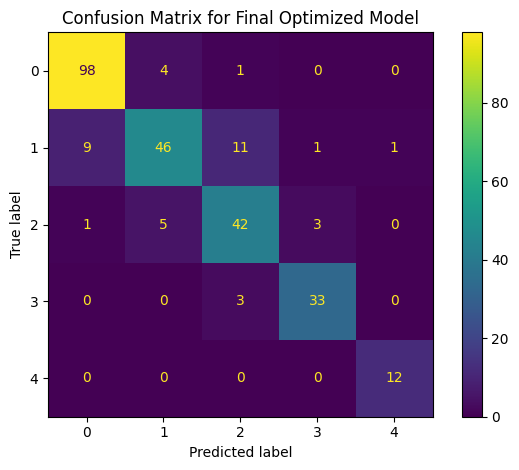

In [66]:
print("Confusion Matrix for Final Optimized Model (on Test Set):")
ConfusionMatrixDisplay.from_estimator(final_model, X_test_rf, y_test_rf)
plt.title("Confusion Matrix for Final Optimized Model")
plt.tight_layout()
plt.show()

<Axes: >

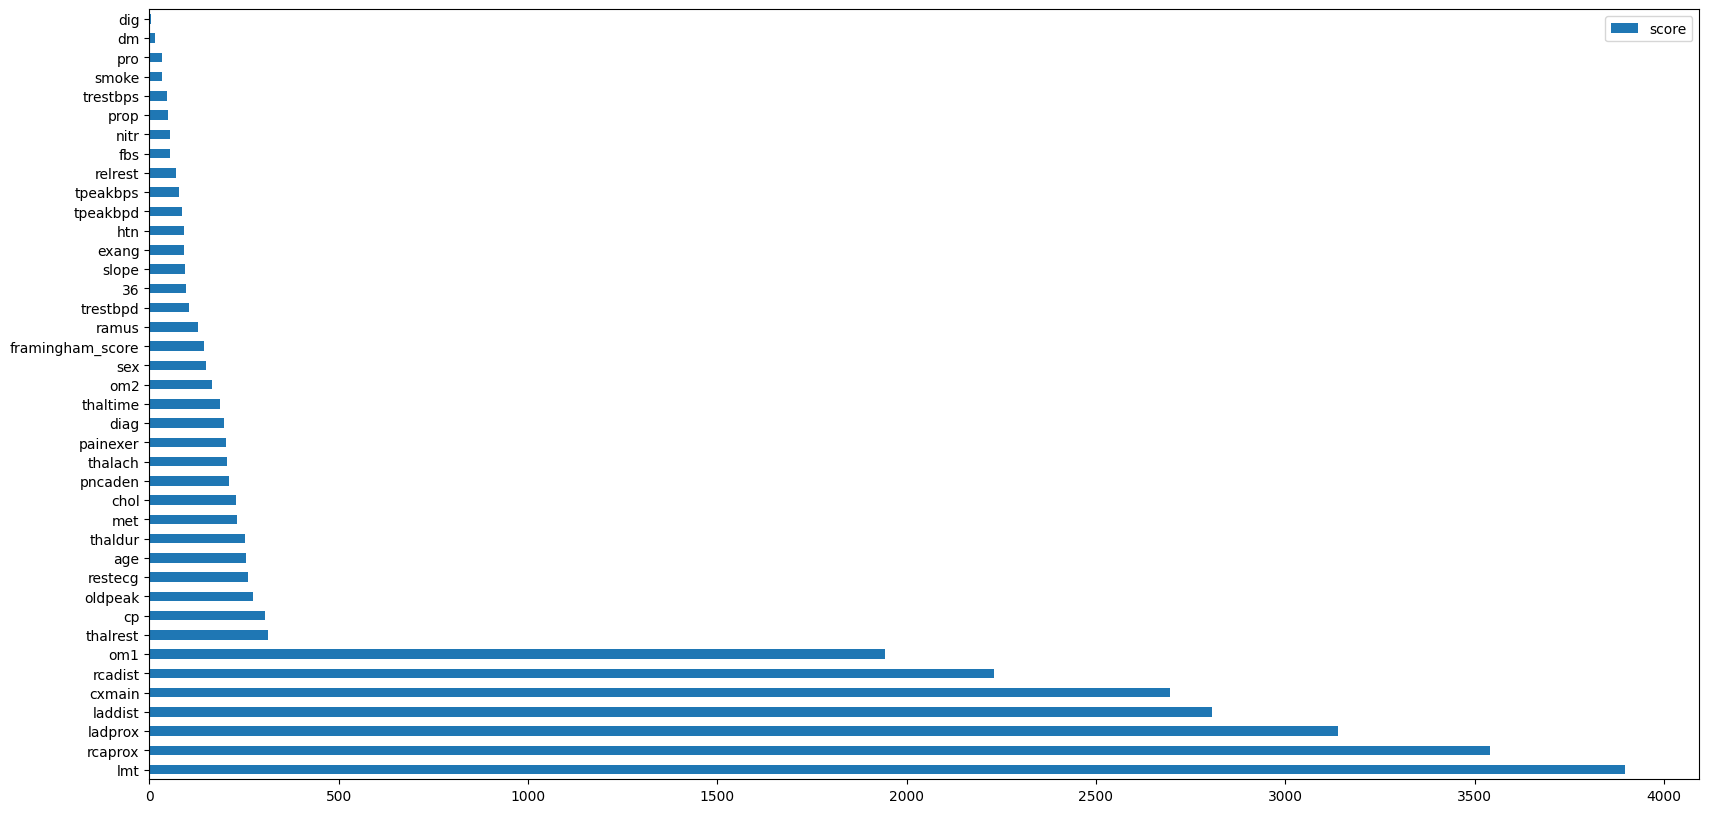

In [68]:
feature_important = final_model.get_booster().get_score(importance_type="total_gain")
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(
    by="score", ascending=False
)
data.nlargest(40, columns="score").plot(kind="barh", figsize=(20, 10))

In [32]:
# Remove info about sex and age


final_model = xgb.XGBClassifier(**final_params)
X_train_rf_no_presonal = X_train_rf.drop(["sex", "age"], axis=1)
final_model.fit(X_train_rf_no_presonal, y_train_rf)

c:\Users\admin\Desktop\EksploracjaDanych\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:47:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.8847802349322829,
              colsample_bynode=0.8505763139127235,
              colsample_bytree=0.9558520868712149, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=1.3052853290644224, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04793676201201679,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=295, n_jobs=None,
              num_parallel_tree=None, ...)

In [34]:
X_test_rf_no_presonal = X_test_rf.drop(["sex", "age"], axis=1)
y_pred_test = final_model.predict(X_test_rf_no_presonal)
final_accuracy = accuracy_score(y_test_rf, y_pred_test)

In [35]:
final_accuracy

0.8333333333333334

Confusion Matrix for Final Optimized Model (on Test Set):


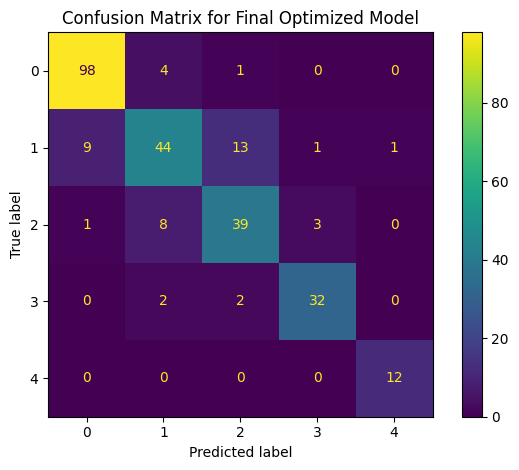

In [37]:
print("Confusion Matrix for Final Optimized Model (on Test Set):")
ConfusionMatrixDisplay.from_estimator(final_model, X_test_rf_no_presonal, y_test_rf)
plt.title("Confusion Matrix for Final Optimized Model")
plt.tight_layout()
plt.show()

<Axes: >

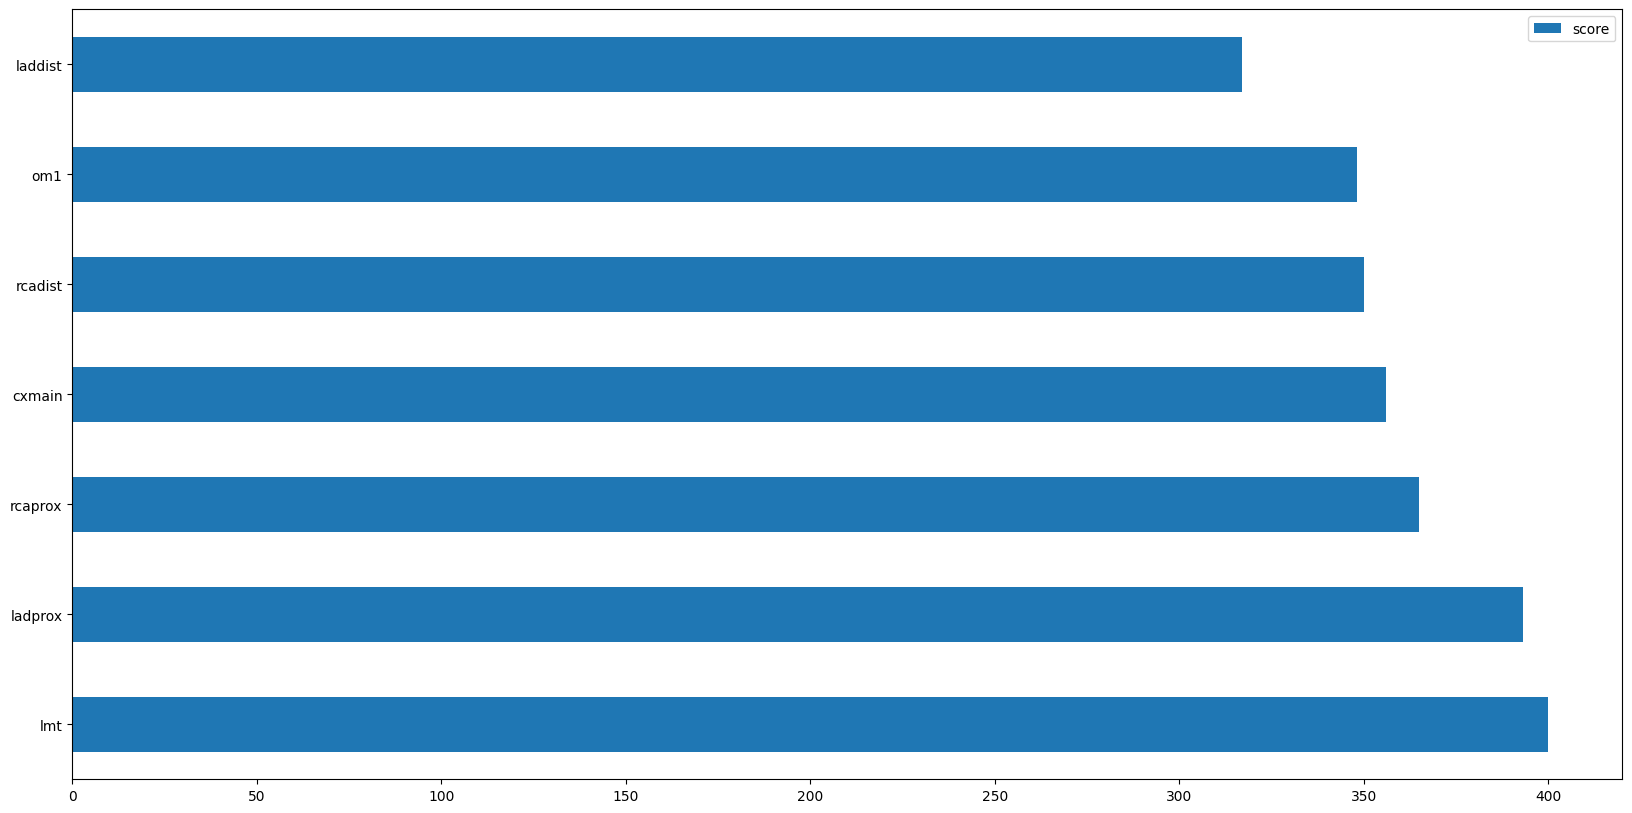

In [61]:
feature_important = final_model.get_booster().get_score(importance_type="weight")
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(
    by="score", ascending=False
)
data.nlargest(40, columns="score").plot(kind="barh", figsize=(20, 10))

In [40]:
no_frams_params_model = xgb.XGBClassifier(**final_params)
X_train_rf_no_frams = X_train_rf.drop(
    ["sex", "age", "chol", "smoke", "trestbps", "dm"], axis=1
)
X_test_rf_no_frams = X_test_rf.drop(
    ["sex", "age", "chol", "smoke", "trestbps", "dm"], axis=1
)

In [41]:
final_model.fit(X_train_rf_no_frams, y_train_rf)

c:\Users\admin\Desktop\EksploracjaDanych\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:04:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.8847802349322829,
              colsample_bynode=0.8505763139127235,
              colsample_bytree=0.9558520868712149, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=1.3052853290644224, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04793676201201679,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=295, n_jobs=None,
              num_parallel_tree=None, ...)

In [42]:
y_pred_test = final_model.predict(X_test_rf_no_frams)
final_accuracy = accuracy_score(y_test_rf, y_pred_test)

In [43]:
final_accuracy

0.8555555555555555

Confusion Matrix for Final Optimized Model (on Test Set):


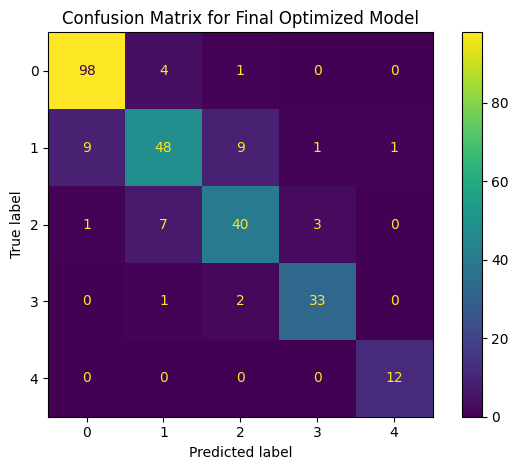

In [45]:
print("Confusion Matrix for Final Optimized Model (on Test Set):")
ConfusionMatrixDisplay.from_estimator(final_model, X_test_rf_no_frams, y_test_rf)
plt.title("Confusion Matrix for Final Optimized Model")
plt.tight_layout()
plt.show()

<Axes: >

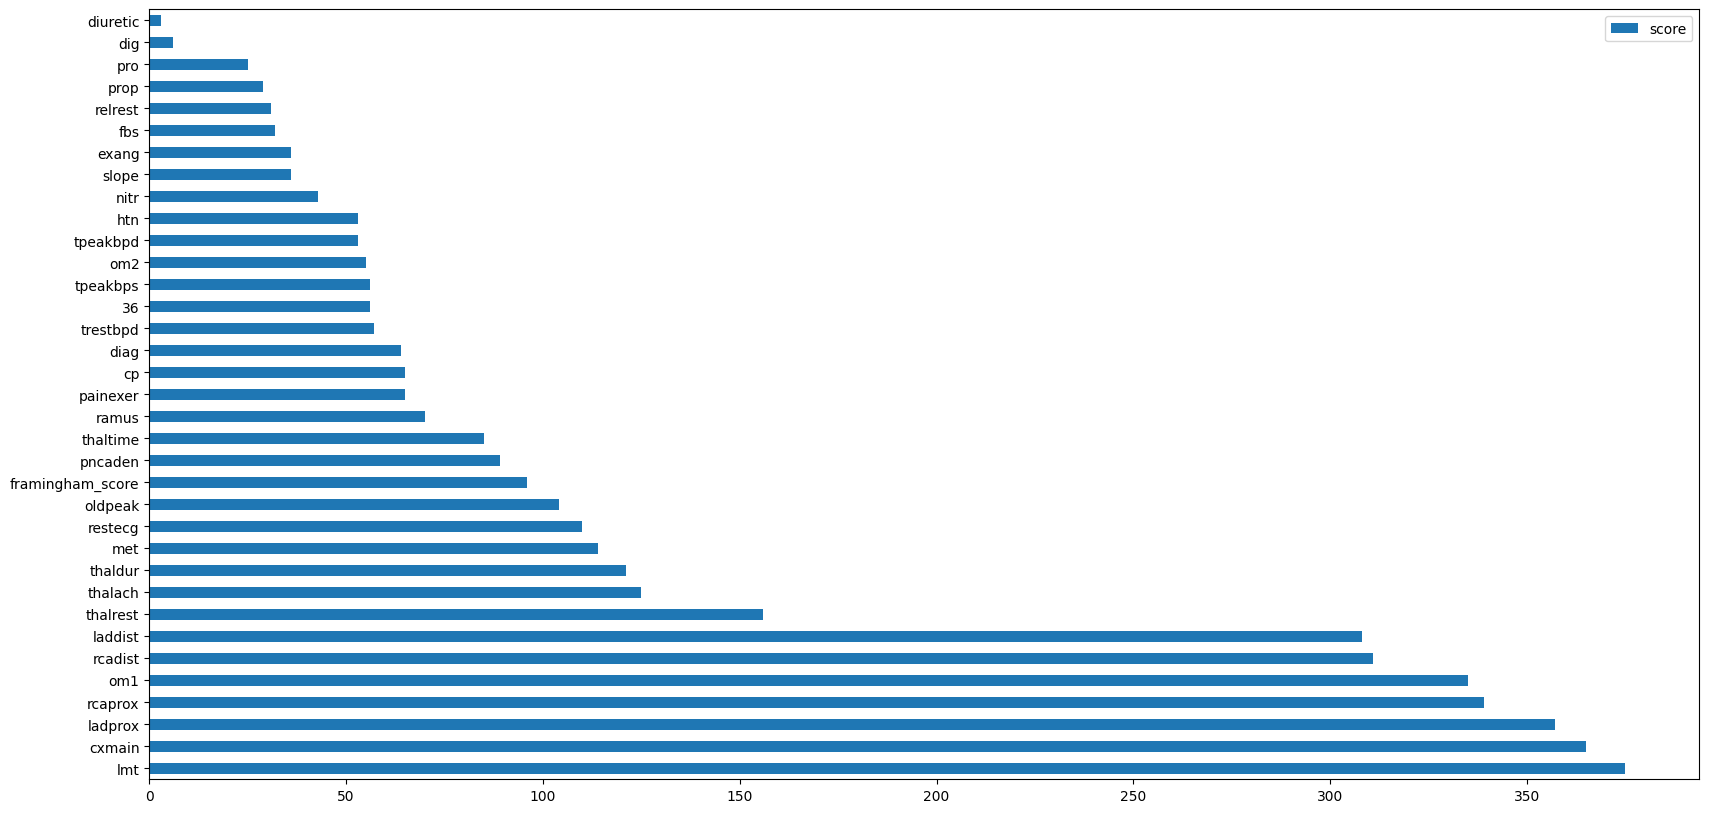

In [46]:
feature_important = final_model.get_booster().get_score(importance_type="weight")
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(
    by="score", ascending=False
)
data.nlargest(40, columns="score").plot(kind="barh", figsize=(20, 10))

In [47]:
no_frams_params_model = xgb.XGBClassifier(**final_params)
X_train_rf_no_heart_info = X_train_rf.drop(
    ["lmt", "cxmain", "ladprox", "rcaprox", "om1", "rcadist", "laddist"], axis=1
)
X_test_rf_no_heart_info = X_test_rf.drop(
    ["lmt", "cxmain", "ladprox", "rcaprox", "om1", "rcadist", "laddist"], axis=1
)

In [48]:
final_model.fit(X_train_rf_no_heart_info, y_train_rf)

c:\Users\admin\Desktop\EksploracjaDanych\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:14:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.8847802349322829,
              colsample_bynode=0.8505763139127235,
              colsample_bytree=0.9558520868712149, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=1.3052853290644224, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04793676201201679,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=295, n_jobs=None,
              num_parallel_tree=None, ...)

In [49]:
y_pred_test = final_model.predict(X_test_rf_no_heart_info)
final_accuracy = accuracy_score(y_test_rf, y_pred_test)

In [50]:
final_accuracy

0.4777777777777778

Confusion Matrix for Final Optimized Model (on Test Set):


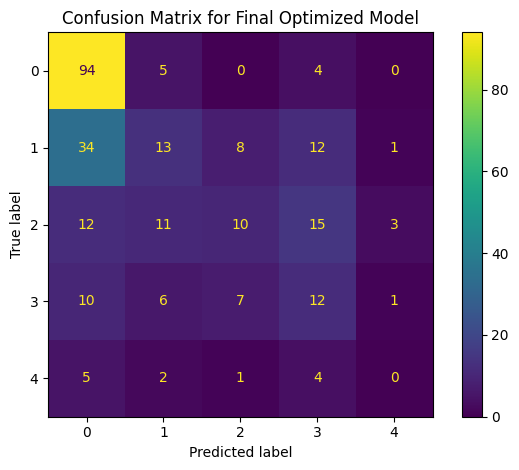

In [ ]:
print("Confusion Matrix for Final Optimized Model (on Test Set):")
ConfusionMatrixDisplay.from_estimator(final_model, X_test_rf_no_heart_info, y_test_rf)
plt.title("Confusion Matrix for Final Optimized Model")
plt.tight_layout()
plt.show()

<Axes: >

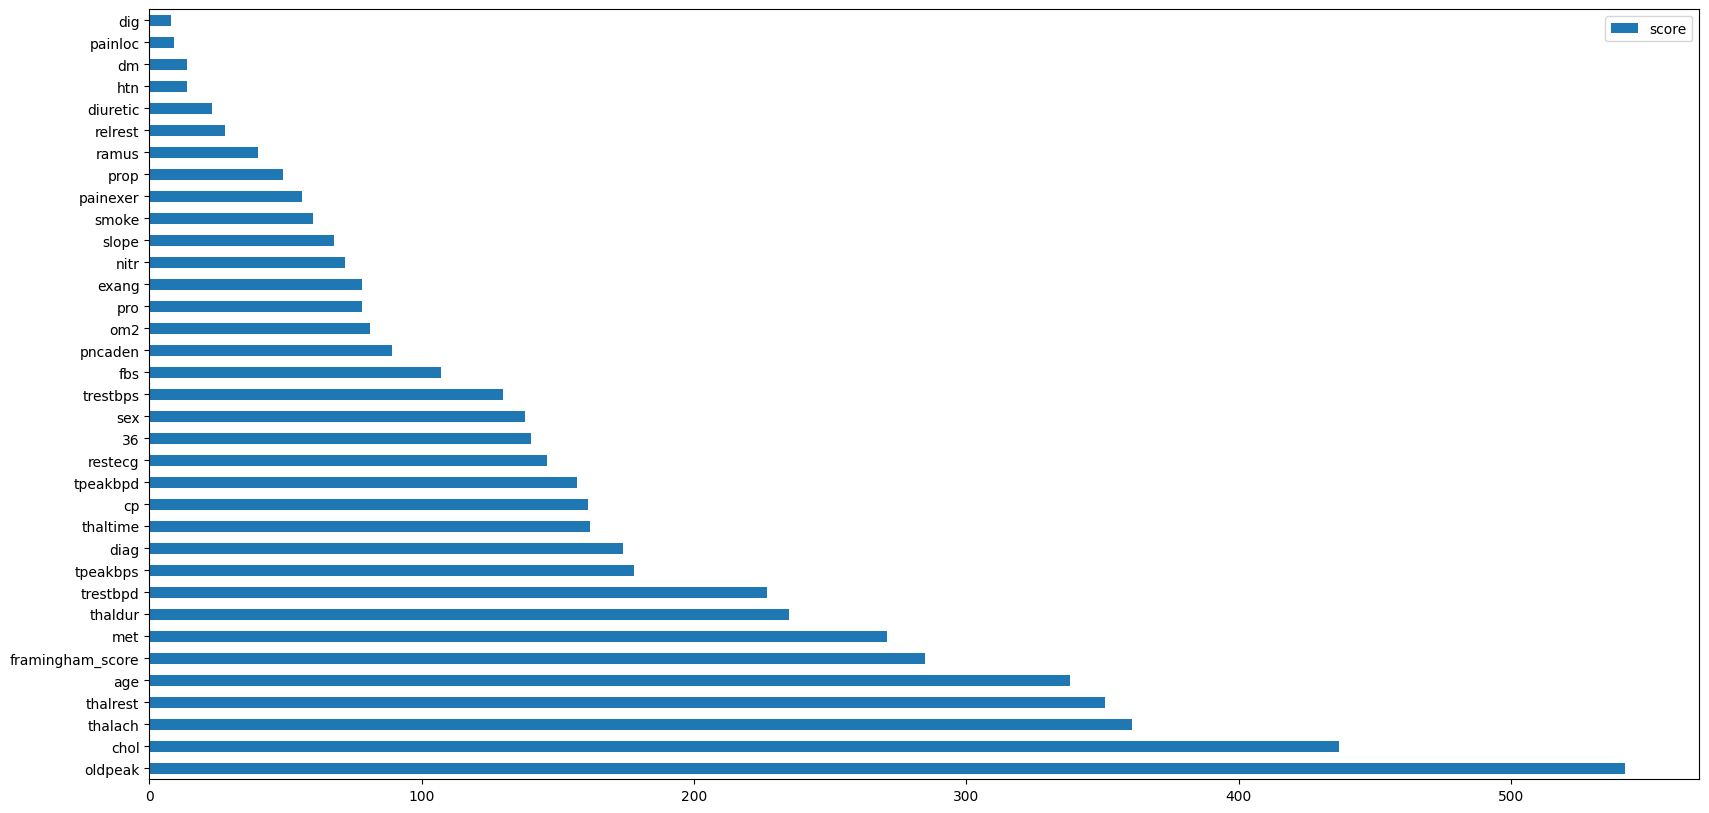

In [53]:
feature_important = final_model.get_booster().get_score(importance_type="weight")
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(
    by="score", ascending=False
)
data.nlargest(40, columns="score").plot(kind="barh", figsize=(20, 10))

In [54]:
no_frams_params_model = xgb.XGBClassifier(**final_params)
X_train_rf_only_heart_info = X_train_rf[
    ["lmt", "cxmain", "ladprox", "rcaprox", "om1", "rcadist", "laddist"]
]

X_test_rf_only_heart_info = X_test_rf[
    ["lmt", "cxmain", "ladprox", "rcaprox", "om1", "rcadist", "laddist"]
]

In [55]:
final_model.fit(X_train_rf_only_heart_info, y_train_rf)

c:\Users\admin\Desktop\EksploracjaDanych\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:24:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.8847802349322829,
              colsample_bynode=0.8505763139127235,
              colsample_bytree=0.9558520868712149, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=1.3052853290644224, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04793676201201679,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=295, n_jobs=None,
              num_parallel_tree=None, ...)

In [56]:
y_pred_test = final_model.predict(X_test_rf_only_heart_info)
final_accuracy = accuracy_score(y_test_rf, y_pred_test)

In [57]:
final_accuracy

0.8666666666666667

Confusion Matrix for Final Optimized Model (on Test Set):


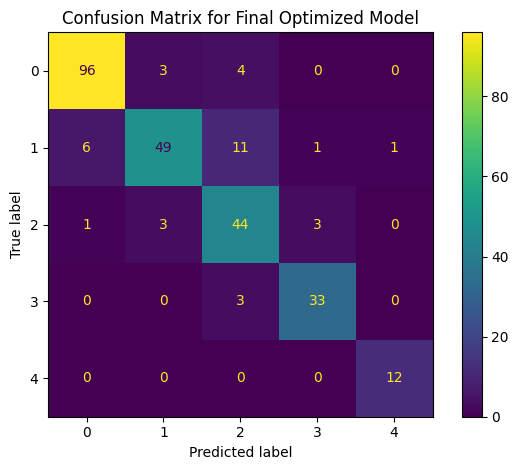

In [58]:
print("Confusion Matrix for Final Optimized Model (on Test Set):")
ConfusionMatrixDisplay.from_estimator(final_model, X_test_rf_only_heart_info, y_test_rf)
plt.title("Confusion Matrix for Final Optimized Model")
plt.tight_layout()
plt.show()

<Axes: >

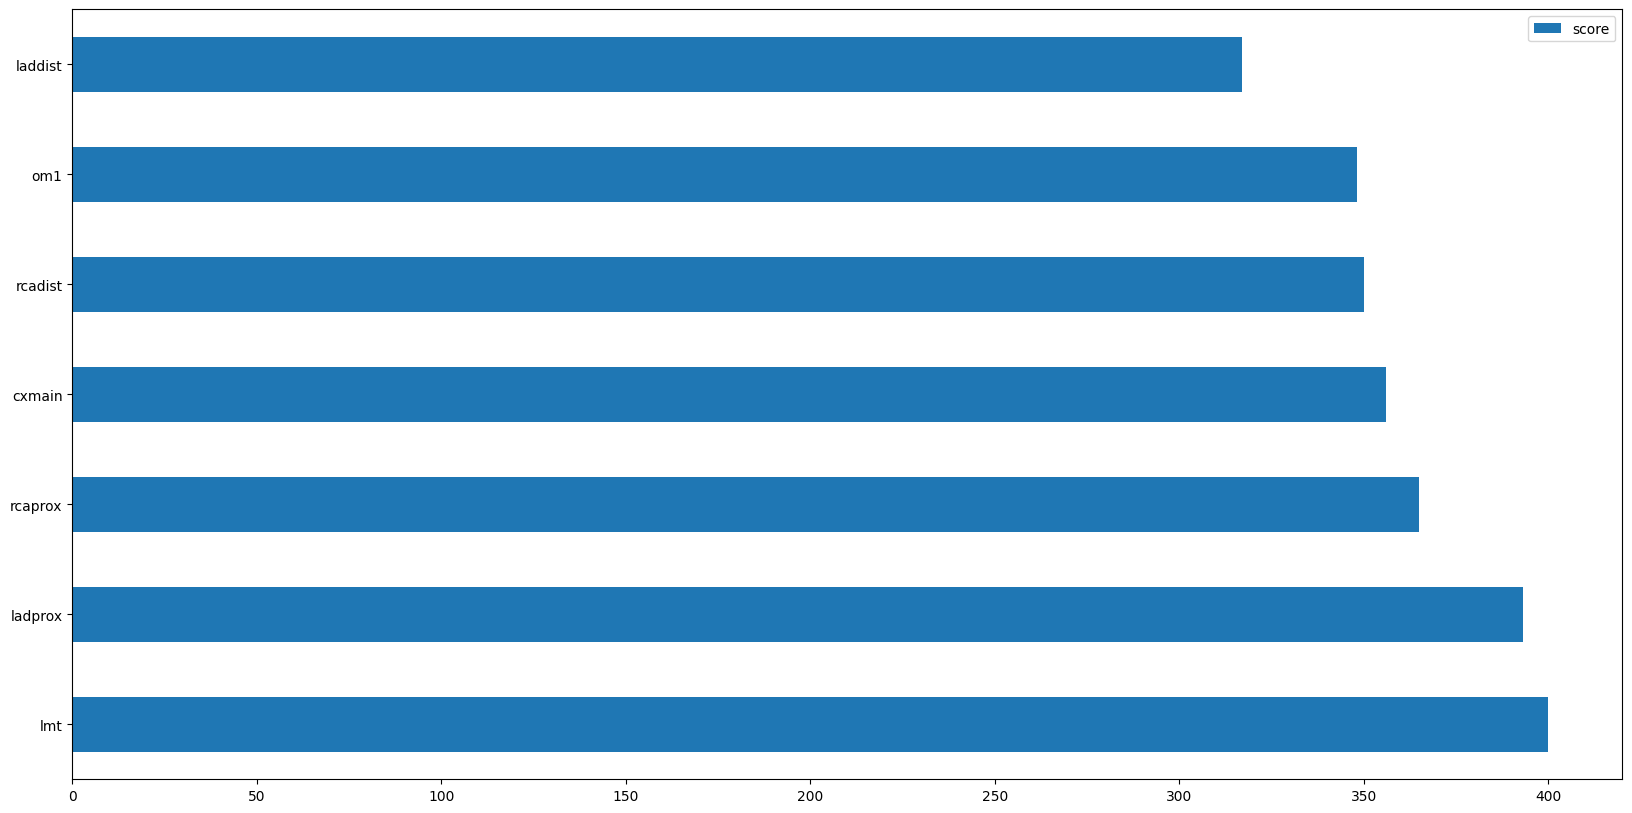

In [59]:
feature_important = final_model.get_booster().get_score(importance_type="weight")
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(
    by="score", ascending=False
)
data.nlargest(40, columns="score").plot(kind="barh", figsize=(20, 10))

In [69]:
def objective(trial):
    params = {
        "booster": trial.suggest_categorical("booster", ["gbtree"]),
        "predictor": "gpu_predictor",
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.8, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 15),
        "gamma": trial.suggest_float("gamma", 0.0, 10.0),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.5, 1.0),
        "colsample_bynode": trial.suggest_float("colsample_bynode", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.5, 5.0),
        "n_estimators": trial.suggest_int("n_estimators", 100, 2000),
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "use_label_encoder": False,
        "verbosity": 0,
    }

    model = xgb.XGBClassifier(**params)

    score = cross_val_score(
        model, X_train_rf_only_heart_info, y_train_rf, cv=10, scoring="accuracy"
    )
    return score.mean()

In [ ]:
study_name = "xgboost_optimization_rf_only_heart"
storage_name = "sqlite:///example.db"
study_rf_xgboost_only_heart = optuna.create_study(
    study_name=study_name,
    storage=storage_name,
    direction="maximize",
    load_if_exists=True,
)
study_rf_xgboost_only_heart.optimize(objective, n_trials=1000)

[I 2025-05-19 17:55:38,973] A new study created in RDB with name: xgboost_optimization_rf_only_heart
[I 2025-05-19 17:55:55,378] Trial 0 finished with value: 0.8115437867774317 and parameters: {'booster': 'gbtree', 'learning_rate': 0.0334615406955809, 'max_depth': 14, 'min_child_weight': 2, 'gamma': 4.983852479285521, 'subsample': 0.7988418272460844, 'colsample_bytree': 0.9401623529854357, 'colsample_bylevel': 0.9574124359460578, 'colsample_bynode': 0.9332205893545471, 'reg_alpha': 1.1044928088956756e-08, 'reg_lambda': 0.00039045807077348104, 'scale_pos_weight': 4.0347087189823645, 'n_estimators': 714}. Best is trial 0 with value: 0.8115437867774317.
[I 2025-05-19 17:56:45,101] Trial 1 finished with value: 0.793890619591554 and parameters: {'booster': 'gbtree', 'learning_rate': 0.12934179194671447, 'max_depth': 17, 'min_child_weight': 9, 'gamma': 4.924695090408714, 'subsample': 0.8966828765774362, 'colsample_bytree': 0.9725948524607855, 'colsample_bylevel': 0.8417268592428686, 'colsamp